In [2]:
from glob import glob

import numpy as np
import pandas as pd
import patsy
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt

% matplotlib inline

NAN = float('nan')
INPUT_PATH = "../data/2/{}_{}.csv"

In [3]:
seasons = "2014-2017"
RB_df = pd.read_csv(INPUT_PATH.format("RB", seasons))
WR_df = pd.read_csv(INPUT_PATH.format("WR", seasons))

* **–1**. A **perfect negative** linear relationship
* **–0.70**. A **strong negative** linear relationship
* **–0.50**. A **moderate negative** relationship
* **–0.30**. A **weak negative** linear relationship
* **0. No linear relationship**
* **+0.30**. A **weak positive** linear relationship
* **+0.50**. A **moderate positive** relationship
* **+0.70**. A **strong positive** linear relationship
* **+1**. A **perfect positive** linear relationship


# Receiving Stats

In [4]:
def show_corr(df):
    formula = 'next_fp ~ rec_td + rec_target + rec_rec + rec_yd'
    fig, ax = plt.subplots(figsize=(10,5), ncols=1, nrows=1)
    df = df.loc[:,('next_fp', 'rec_td', 'rec_target', 'rec_rec', 'rec_yd')]

    sns.pairplot(df, size=1.2, aspect=1.5)
    sns.heatmap(df.corr(), cmap="seismic", annot=True, ax=ax)
    
    y, X = patsy.dmatrices(formula, data=RB_df, return_type="dataframe")
    model = sm.OLS(y, X)
    fit = model.fit()
    return fit.summary()

## RB

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.576
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.08e-07
Time:                        20:03:14   Log-Likelihood:                -10563.
No. Observations:                3193   AIC:                         2.114e+04
Df Residuals:                    3188   BIC:                         2.117e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5176      0.191     49.777      0.000       9.143       9.893
rec_td        -0.3617      0.358     -1.011      0.312      -1.063       0.339
rec_target     0.3417      0.123      2.771      0.006       0.100       0.584
rec_rec       -0.2141      0.167     -1.285      0.199      -0.541       0.113
rec_yd         0.0154      0.008      1.854      0.064      -0.001       0.032
==============================================================================
Omnibus:                      700.805   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.206
Skew:                           1.310   Prob(JB):                    5.92e-302
Kurtosis:                       4.888   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

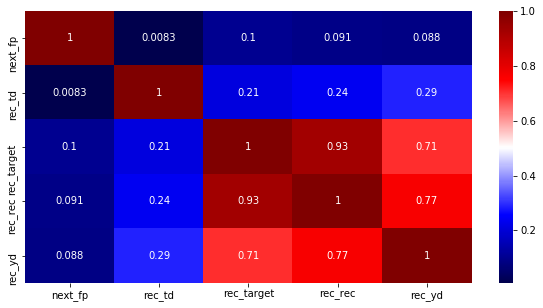

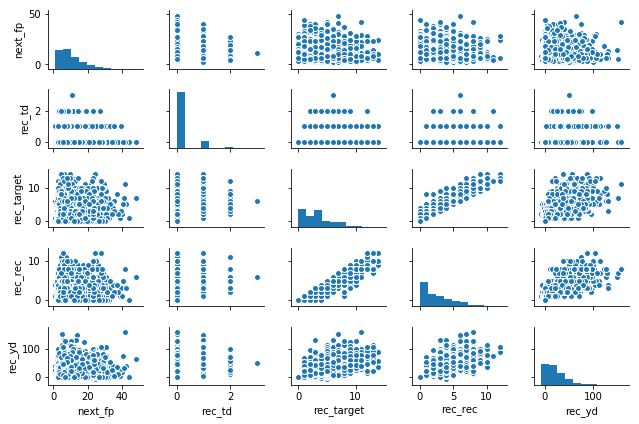

In [5]:
show_corr(RB_df)

## WR

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.576
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.08e-07
Time:                        20:03:20   Log-Likelihood:                -10563.
No. Observations:                3193   AIC:                         2.114e+04
Df Residuals:                    3188   BIC:                         2.117e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5176      0.191     49.777      0.000       9.143       9.893
rec_td        -0.3617      0.358     -1.011      0.312      -1.063       0.339
rec_target     0.3417      0.123      2.771      0.006       0.100       0.584
rec_rec       -0.2141      0.167     -1.285      0.199      -0.541       0.113
rec_yd         0.0154      0.008      1.854      0.064      -0.001       0.032
==============================================================================
Omnibus:                      700.805   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.206
Skew:                           1.310   Prob(JB):                    5.92e-302
Kurtosis:                       4.888   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

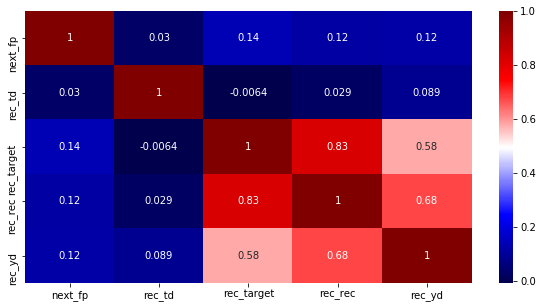

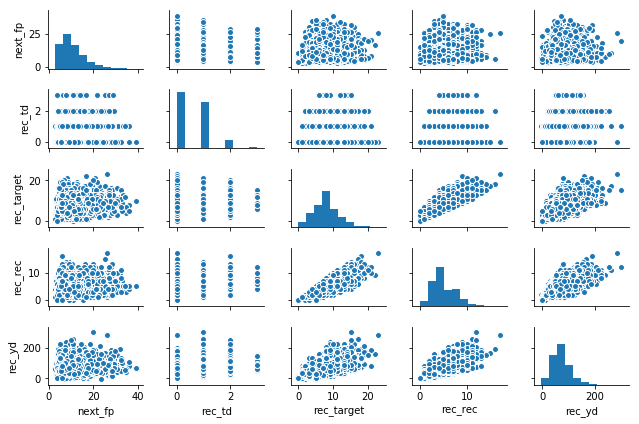

In [6]:
show_corr(WR_df)

## All

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                next_fp   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.576
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.08e-07
Time:                        20:03:36   Log-Likelihood:                -10563.
No. Observations:                3193   AIC:                         2.114e+04
Df Residuals:                    3188   BIC:                         2.117e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5176      0.191     49.777      0.000       9.143       9.893
rec_td        -0.3617      0.358     -1.011      0.312      -1.063       0.339
rec_target     0.3417      0.123      2.771      0.006       0.100       0.584
rec_rec       -0.2141      0.167     -1.285      0.199      -0.541       0.113
rec_yd         0.0154      0.008      1.854      0.064      -0.001       0.032
==============================================================================
Omnibus:                      700.805   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1387.206
Skew:                           1.310   Prob(JB):                    5.92e-302
Kurtosis:                       4.888   Cond. No.                         96.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

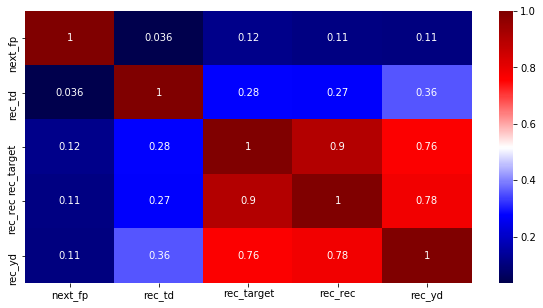

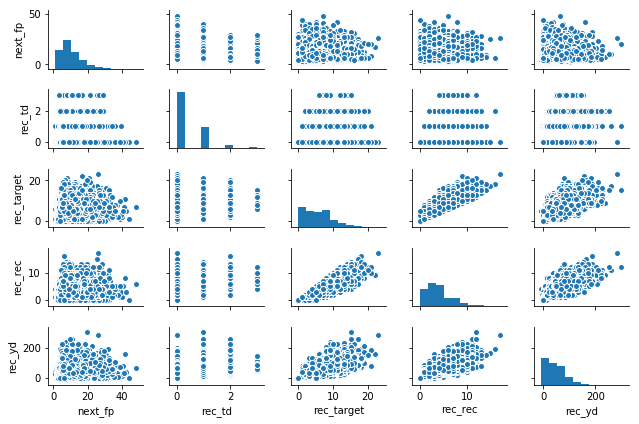

In [7]:
col = ['next_fp', 'fp', 'rec_td', 'rec_target', 'rec_rec', 'rec_yd']

combined = RB_df[col].append(
    WR_df[col])
show_corr(combined)

* rec_rec, rec_yd, and rec_target are probably collinear.

In [8]:
# Might be interesting:
## successful reception rate (rec_rec/rec_target)
## average yards gained per reception (rec_yd/rec_rec).
combined['success_ratio'] = combined['rec_rec']/combined['rec_target']
combined['avg_yd'] = combined['rec_yd']/combined['rec_rec']
combined = combined.dropna()

next_fp          1.000000
fp               0.191269
rec_td           0.025686
avg_yd          -0.000298
success_ratio   -0.047189
Name: next_fp, dtype: float64
fp               1.000000
rec_td           0.526193
next_fp          0.191269
avg_yd           0.163672
success_ratio    0.066863
Name: fp, dtype: float64


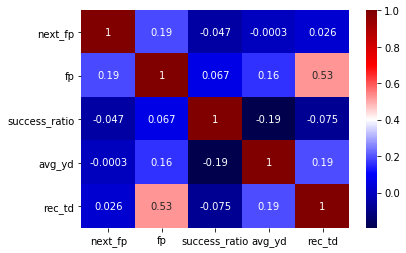

In [9]:
df = combined.loc[:,('next_fp', 'fp', 'success_ratio', 'avg_yd', 'rec_td')]
print(df.corr()['next_fp'].sort_values(ascending=False))
print(df.corr()['fp'].sort_values(ascending=False))
sns.heatmap(df.corr(), cmap="seismic", annot=True);
# That didn't help...